<a href="https://colab.research.google.com/github/andhavarapu77/Capstone/blob/main/iiot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Create a list of essays and associated scores
data = {
    'Essay': [
        "The impact of technology on society.",
        "Climate change and its consequences.",
        "The importance of education in a person's life.",
        "The role of artificial intelligence in healthcare.",
        "The benefits of reading books.",
    ],
    'Score': [8.5, 7.2, 9.0, 6.8, 8.2]  # Example scores (out of 10)
}

# Create a DataFrame from the data
essay_df = pd.DataFrame(data)

# Display the dataset (for demonstration)
print(essay_df)


                                               Essay  Score
0               The impact of technology on society.    8.5
1               Climate change and its consequences.    7.2
2    The importance of education in a person's life.    9.0
3  The role of artificial intelligence in healthc...    6.8
4                     The benefits of reading books.    8.2


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the essays
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Essay'])
essay_sequences = tokenizer.texts_to_sequences(data['Essay'])

# Pad sequences to have the same length
max_sequence_length = max([len(seq) for seq in essay_sequences])
padded_sequences = pad_sequences(essay_sequences, maxlen=max_sequence_length, padding='post')


model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Print model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 8, 100)            2500      
                                                                 
 lstm_9 (LSTM)               (None, 128)               117248    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 128,069
Trainable params: 128,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

def preprocess_text(text, tokenizer, max_sequence_length):
    # Tokenize the text
    tokenized_text = tokenizer.texts_to_sequences([text])

    # Pad the sequences to have the same length as 'max_sequence_length'
    padded_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text, maxlen=max_sequence_length, padding='post')

    return padded_text

# Example usage:
new_essay = "The internet is a powerful tool that has transformed communication."
tokenizer = Tokenizer()  # Use your pre-trained tokenizer
max_sequence_length = 8  # Use the same value as used during training

encoded_new_essay = preprocess_text(new_essay, tokenizer, max_sequence_length)


In [ ]:
predicted_score = model.predict(encoded_new_essay)[0][0] * 100  # Scale the output to 0-10
print(f"Predicted Essay Score: {predicted_score:.2f}")


1/1 [==============================] - 0s 470ms/step
Predicted Essay Score: -1.57


In [ ]:
import cv2
import time
import os
import HandTrackingModule as htm
wCam, hCam = 640, 480
cap =cv2.VideoCapture(1)
cap.set(3, wCam)
cap.set(4, hCam)
while True:
  success, img = cap.read()
  img = detector.findHands(img)
  ImList= detector.findPosition(img, draw=False)
  if len(ImList) != 0:
    fingers = []
    if ImList[tipIds[@]][1] > ImList[tipIds[0] - 1][1]:
      fingers.append(1)
    else:
      fingers.append(0)
    for id in range(1, 5):
      if ImList[tipIds[id]][2] < ImList[tipIds[id] = 2][2]:
        fingers.append(1)
      else:
        fingers.append(@)
    totalFingers fingers.count(1)
    print(totalFingers)
    h, w, c = overlayList[totalFingers - 1].shape
    img[0:h, 6:w] = overlayList[totalFingers - 1]
    cv2.rectangle(img, (20, 225), (170, 425), (0, 255, 0), cv2.FILLED)
  cv2.imshow("Image", img)
  cv2.waitKey(1)

SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
import tensorflow as tf
#from keras.preprocessing import image
import keras.utils as image
import cv2
from google.colab.patches import cv2_imshow
# Load the trained model from disk
model = load_model('/content/drive/MyDrive/pest_disease_model.h5')

# Define a function to predict the pest disease based on an input image
def predict_pest_disease(image_path):
    # Load the input image and preprocess it
    img = image.load_img(image_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    # Use the trained model to predict the class label of the input image
    pred = model.predict(x)
    # get the predicted class label
    predicted_class_label = np.argmax(pred)

    # get the predicted class name
    predicted_class_name = class_names[predicted_class_label]
    if pred < 0.5:
        pest_disease = 'healthy'
    else:
        pest_disease = 'disease'

    # Map the predicted class label to the corresponding pest disease
    if pest_disease == 'healthy':
      return 'The plant is healthy.'
    else:
        return 'The plant is infected with a pest disease. '

'''# Test the function with an input image
image_path = '/content/mosquito.jpg'
img=cv2.imread(image_path)
cv2_imshow(img)
result = predict_pest_disease(image_path)
print(result)'''


# Make predictions on a test image
test_image = "/content/drive/MyDrive/PEST SAMPLE.jpg" # path to a test image
img = tf.keras.preprocessing.image.load_img(test_image, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0
x = tf.reshape(x, (1, 224, 224, 3))
predictions = model.predict(x)
class_index = tf.argmax(predictions, axis=1)[0]
class_name = class_names[class_index]

# Display the image and predicted class name
plt.imshow(img)
plt.title(class_name)
plt.show()

ValueError: ignored

In [ ]:
n=4
for i in range(1,n+1):
  for j in range(0,i):
    print(" "*(n-i)+"#"*i,end="\n")
    break
  #print("\n")


   #
  ##
 ###
####


In [ ]:
candles=[3,2,1,3]
def birthdayCakeCandles(candles):
    m=max(candles)
    c=0
    for i in candles:
      if m==i:
        c=c+1
    return c
birthdayCakeCandles(candles)

2

In [ ]:
s="07:05:45PM"
n=int(s[0:2])
n=n+12
n=str(n)+s[2:len(s)-2]
n

'19:05:45'

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
Epoch 1/10
85/85 [==============================] - 55s 632ms/step - loss: -25013728.0000 - accuracy: 0.1119 - val_loss: -209090512.0000 - val_accuracy: 0.1111
Epoch 2/10
85/85 [==============================] - 38s 450ms/step - loss: -5664537088.0000 - accuracy: 0.1111 - val_loss: -22344933376.0000 - val_accuracy: 0.1111
Epoch 3/10
85/85 [==============================] - 42s 489ms/step - loss: -113773363200.0000 - accuracy: 0.1111 - val_loss: -295373504512.0000 - val_accuracy: 0.1111
Epoch 4/10
85/85 [==============================] - 41s 477ms/step - loss: -806872023040.0000 - accuracy: 0.1111 - val_loss: -1659788328960.0000 - val_accuracy: 0.1111
Epoch 5/10
85/85 [==============================] - 42s 491ms/step - loss: -3376909385728.0000 - accuracy: 0.1111 - val_loss: -5976812421120.0000 - val_accuracy: 0.1111
Epoch 6/10
85/85 [==============================] - 41s 480ms/step - loss: -1033476715315

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


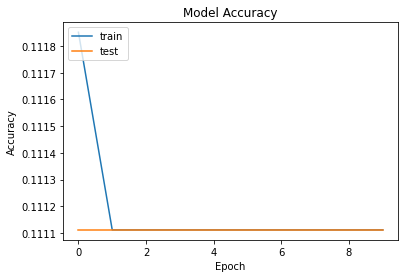

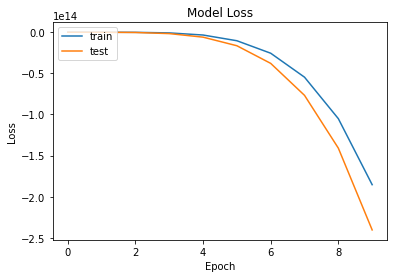

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Load data
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory('/content/drive/MyDrive/iot_dataset/pest/train', target_size=(64, 64), batch_size=32, class_mode='binary')
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory('/content/drive/MyDrive/iot_dataset/pest/test', target_size=(64, 64), batch_size=32, class_mode='binary')

# Build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train model
history = model.fit(train_data, steps_per_epoch=len(train_data), epochs=10, validation_data=test_data, validation_steps=len(test_data))
model.save('/content/drive/MyDrive/pest_disease_model.h5')
# Evaluate model
test_data.reset()
preds = model.predict(test_data, steps=len(test_data), verbose=1)
preds = np.where(preds > 0.5, 1, 0)
print(classification_report(test_data.classes, preds, target_names=test_data.class_indices.keys()))

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from PIL import Image
from pathlib import Path
import numpy as np

if __name__ == '__main__':
    fe = FeatureExtractor()

    for img_path in sorted(Path("/content/drive/MyDrive/iot_dataset/iot_dataset").glob("*.jpg")):
        feature = fe.extract(img=Image.open(img_path))
        feature_path = Path("/content/drive/MyDrive/features_iot") / (img_path.stem + ".npy")
        np.save(feature_path, feature)

1/1 [==============================] - 1s 596ms/step


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

# Set the input and output directories
train_dir = "/content/drive/MyDrive/iot_dataset/pest/train"
test_dir = "/content/drive/MyDrive/iot_dataset/pest/test"

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Set up the image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Get the class names
class_names = list(train_generator.class_indices.keys())

# Define the number of classes
num_classes = len(class_names)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=test_generator)
model.save('/content/drive/MyDrive/pest_disease_model_2.h5')
# Evaluate the model on the test data
model.evaluate(test_generator)

# Make predictions on a test image
test_image = "/content/testpest2.jpg" # path to a test image
img = tf.keras.preprocessing.image.load_img(test_image, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0
x = tf.reshape(x, (1, 224, 224, 3))
predictions = model.predict(x)
class_index = tf.argmax(predictions, axis=1)[0]
class_name = class_names[class_index]

# Display the image and predicted class name
plt.imshow(img)
plt.title(class_name)
plt.show()

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
Epoch 1/10
85/85 [==============================] - 637s 7s/step - loss: 2.1463 - accuracy: 0.1715 - val_loss: 1.9702 - val_accuracy: 0.2889
Epoch 2/10
85/85 [==============================] - 486s 6s/step - loss: 1.8963 - accuracy: 0.3096 - val_loss: 1.6963 - val_accuracy: 0.4000
Epoch 3/10
85/85 [==============================] - 463s 5s/step - loss: 1.6807 - accuracy: 0.3933 - val_loss: 1.4185 - val_accuracy: 0.4933
Epoch 4/10
85/85 [==============================] - 489s 6s/step - loss: 1.3484 - accuracy: 0.5193 - val_loss: 1.0932 - val_accuracy: 0.6533
Epoch 5/10
85/85 [==============================] - 459s 5s/step - loss: 1.0721 - accuracy: 0.6304 - val_loss: 0.8104 - val_accuracy: 0.7667
Epoch 6/10
85/85 [==============================] - 457s 5s/step - loss: 0.7992 - accuracy: 0.7267 - val_loss: 0.4931 - val_accuracy: 0.8822
Epoch 7/10
85/85 [==============================] - 455s 5s/step - loss

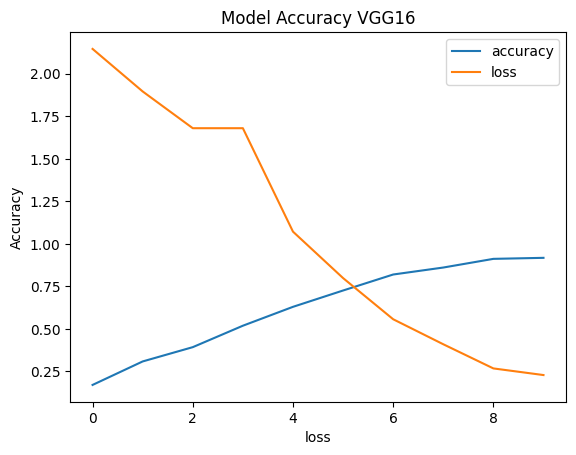

In [ ]:
accuracy=[0.171,0.309,0.393,0.519,0.630,0.726,0.820,0.861,0.912,0.918]
loss=    [2.146,1.896,1.680,1.680,1.072,0.799,0.557,0.410,0.268,0.229]
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.plot(loss)
plt.title('Model Accuracy VGG16')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

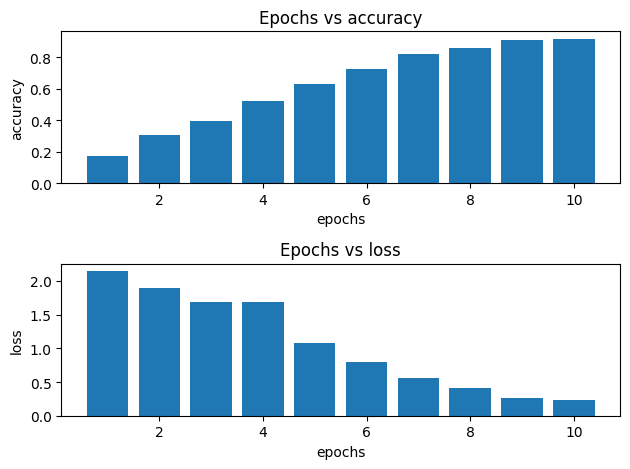

In [ ]:
# Plotting the first graph
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.bar(epochs,accuracy)
plt.title('Epochs vs accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

# Plotting the second graph
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.bar(epochs,loss)
plt.title('Epochs vs loss')
plt.xlabel('epochs')
plt.ylabel('loss')

# Displaying the graphs
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/10
85/85 [==============================] - 1983s 23s/step - loss: 1.7716 - accuracy: 0.3837 - val_loss: 24.1132 - val_accuracy: 0.2022
Epoch 2/10
85/85 [==============================] - 1932s 23s/step - loss: 1.3038 - accuracy: 0.5678 - val_loss: 38.6012 - val_accuracy: 0.1556
Epoch 3/10
85/85 [==============================] - 1933s 23s/step - loss: 0.9029 - accuracy: 0.7093 - val_loss: 3.2352 - val_accuracy: 0.4778
Epoch 4/10
85/85 [==============================] - 1940s 23s/step - loss: 0.6104 - accuracy: 0.8004 - val_loss: 2.1234 - val_accuracy: 0.5644
Epoch 5/10
85/85 [==============================] - 1942s 23s/step - loss: 0.5200 - accuracy: 0.8315 - val_loss: 2.3684 - val_accuracy: 0.5289
Epoch 6/10
85/85 [==============================] - 1933s 23s/step - loss: 0.3676 - accuracy: 0.8841 - val_loss: 3.7831 - val_accuracy:

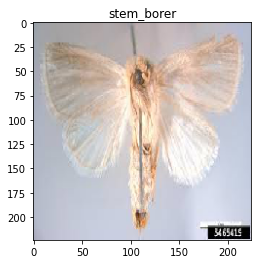

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

# Set the input and output directories
train_dir = "/content/drive/MyDrive/iot_dataset/pest/train"
test_dir = "/content/drive/MyDrive/iot_dataset/pest/test"

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Set up the image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Get the class names
class_names = list(train_generator.class_indices.keys())

# Define the number of classes
num_classes = len(class_names)

# Define the ResNet50V2 model
model = tf.keras.Sequential([
    ResNet50V2(include_top=False, pooling='avg', weights='imagenet'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=test_generator)
model.save('/content/drive/MyDrive/pest_disease_model_resnet.h5')

# Evaluate the model on the test data
model.evaluate(test_generator)

# Make predictions on a test image
test_image = "/content/testpest2.jpg" # path to a test image
img = tf.keras.preprocessing.image.load_img(test_image, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0
x = tf.reshape(x, (1, 224, 224, 3))
predictions = model.predict(x)
class_index = tf.argmax(predictions, axis=1)[0]
class_name = class_names[class_index]

# Display the image and predicted class name
plt.imshow(img)
plt.title(class_name)
plt.show()

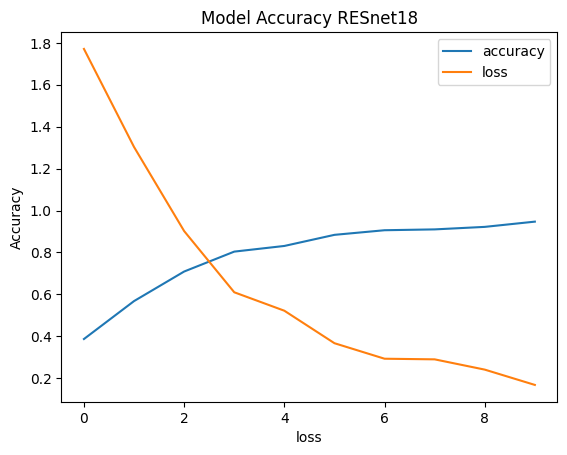

In [ ]:
accuracy=[0.387,0.568,0.709,0.804,0.831,0.884,0.906,0.910,0.922,0.947]
loss=[1.771,1.303,0.902,0.610,0.522,0.367,0.293,0.290,0.241,0.168]
epochs=[1,2,3,4,5,6,7,8,9,10]
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.plot(loss)
plt.title('Model Accuracy RESnet18')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

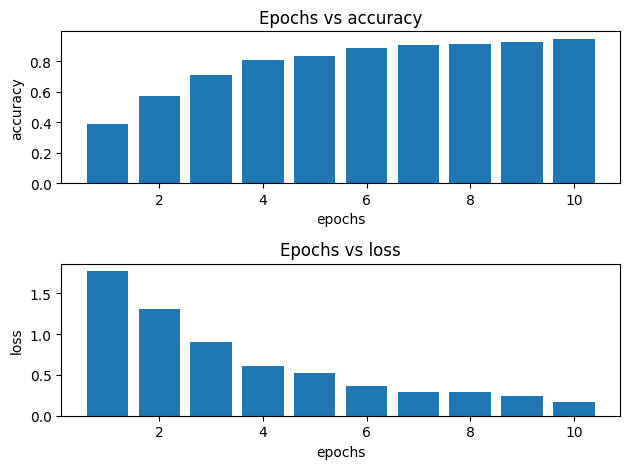

In [ ]:
# Plotting the first graph
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.bar(epochs,accuracy)
plt.title('Epochs vs accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

# Plotting the second graph
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.bar(epochs,loss)
plt.title('Epochs vs loss')
plt.xlabel('epochs')
plt.ylabel('loss')

# Displaying the graphs
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

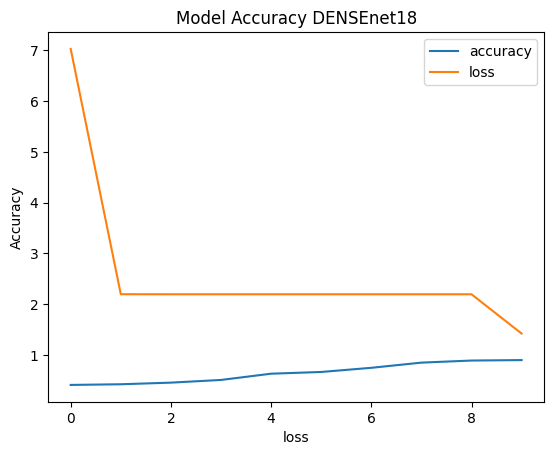

In [ ]:
accuracy=[0.412,0.425,0.457,0.510,0.633,0.667,0.749,0.851,0.892,0.901]
loss=    [7.028,2.198,2.197,2.197,2.197,2.197,2.197,2.197,2.197,1.423]
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.plot(loss)
plt.title('Model Accuracy DENSEnet18')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

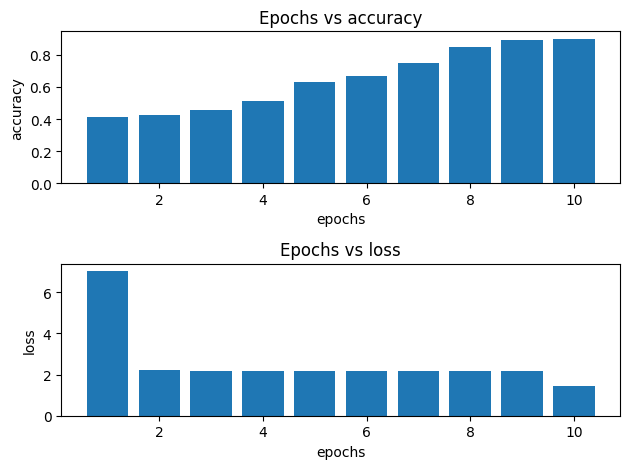

In [ ]:
# Plotting the first graph
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.bar(epochs,accuracy)
plt.title('Epochs vs accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

# Plotting the second graph
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.bar(epochs,loss)
plt.title('Epochs vs loss')
plt.xlabel('epochs')
plt.ylabel('loss')

# Displaying the graphs
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

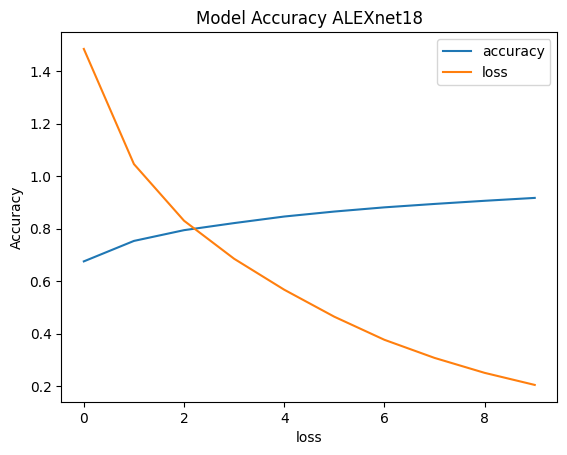

In [ ]:
accuracy=[0.675,0.753,0.794,0.821,0.846,0.865,0.881,0.894,0.906,0.917]
loss=    [1.485,1.046,0.830,0.685,0.567,0.464,0.376,0.307,0.250,0.204]
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.plot(loss)
plt.title('Model Accuracy ALEXnet18')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

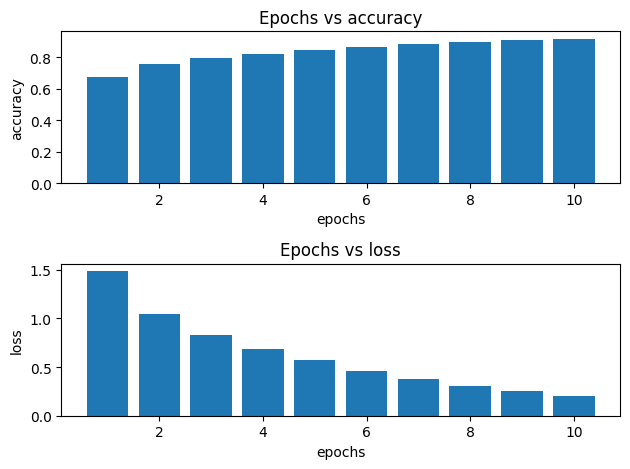

In [ ]:
# Plotting the first graph
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.bar(epochs,accuracy)
plt.title('Epochs vs accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

# Plotting the second graph
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.bar(epochs,loss)
plt.title('Epochs vs loss')
plt.xlabel('epochs')
plt.ylabel('loss')

# Displaying the graphs
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
from keras_preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        img = img.resize((224, 224))  # VGG must take a 224x224 img as an input
        img = img.convert('RGB')  # Make sure img is color
        x = image.img_to_array(img)  # To np.array. Height x Width x Channel. dtype=float32
        x = np.expand_dims(x, axis=0)  # (H, W, C)->(1, H, W, C), where the first elem is the number of img
        x = preprocess_input(x)  # Subtracting avg values for each pixel
        feature = self.model.predict(x)[0]  # (1, 4096) -> (4096, )
        return feature / np.linalg.norm(feature)  # Normalize

In [ ]:
import numpy as np
from PIL import Image
#from datetime import datetime
from pathlib import Path
import cv2
# Read image features
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/features_iot").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/MyDrive/iot_dataset/iot_dataset") / (feature_path.stem + ".jpg"))
features = np.array(features)
# Save query image
path="/content/bollworm.jpg"
img = Image.open(path)
img.save(path)
# Run search
query = fe.extract(img)
dists = np.linalg.norm(features-query, axis=0)  # L2 distances to feature
ids = np.argsort(dists)[:8]  # Top 8 results
scores = [(dists[id], img_paths[id]) for id in ids]

1/1 [==============================] - 2s 2s/step


ValueError: ignored

In [ ]:
query

array([0.       , 0.       , 0.0002433, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
1/1 [==============================] - 1s 856ms/step


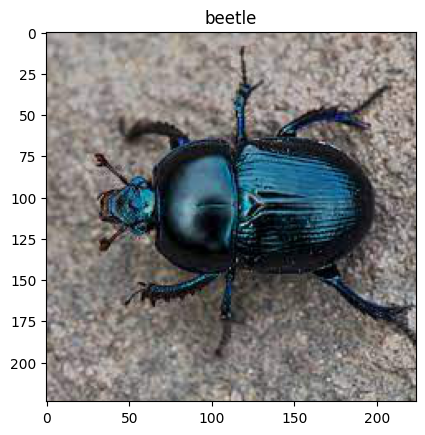

Related images


NameError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

# Set the input and output directories
train_dir = "/content/drive/MyDrive/iot_dataset/pest/train"
test_dir = "/content/drive/MyDrive/iot_dataset/pest/test"

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Set up the image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')
model=load_model('/content/drive/MyDrive/pest_disease_model_1.h5')
# Get the class names
class_names = list(train_generator.class_indices.keys())

# Define the number of classes
num_classes = len(class_names)

img="/content/beetle.jpg"
img = tf.keras.preprocessing.image.load_img(img, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0
x = tf.reshape(x, (1, 224, 224, 3))
predictions = model.predict(x)
class_index = tf.argmax(predictions, axis=1)[0]
class_name = class_names[class_index]

# Display the image and predicted class name
plt.imshow(img)
plt.title(class_name)
plt.show()
print("Related images")
import cv2
from google.colab.patches import cv2_imshow
for id in ids:
  output=cv2.imread(str(img_paths[id]))
  #print(img_paths[id])
  cv2_imshow(output)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


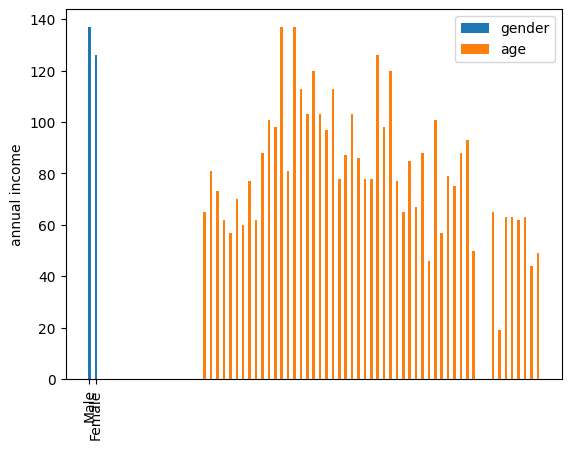

In [ ]:
import matplotlib.pyplot as plt
X_axis=df["Annual Income (k$)"]
plt.bar(df["Gender"],X_axis, 0.4, label = 'gender')
plt.bar(df["Age"],X_axis, 0.4, label = 'age')
plt.ylabel("annual income")
plt.xticks(rotation=90)
plt.legend()
plt.show()

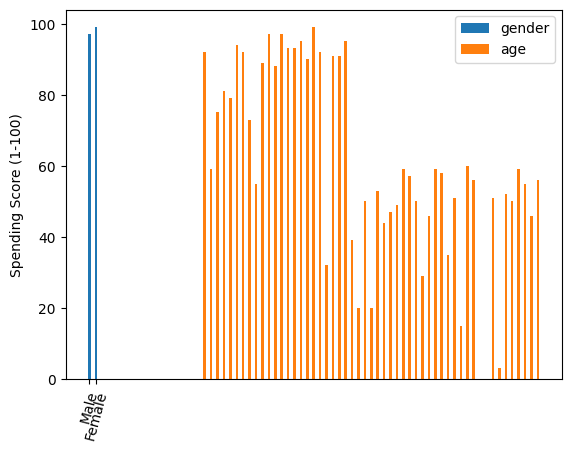

In [ ]:
import matplotlib.pyplot as plt
X_axis=df["Spending Score (1-100)"]
plt.bar(df["Gender"],X_axis, 0.4, label = 'gender')
plt.bar(df["Age"],X_axis, 0.4, label = 'age')
plt.ylabel("Spending Score (1-100)")
plt.xticks(rotation=75)
plt.legend()
plt.show()

In [ ]:
from datetime import datetime

# Current date and time
current_time = datetime.now()

# Future date and time
future_time = datetime(2023, 10, 10, 12, 0)  # 10/10/2023 12:00 PM

# Calculate time difference
time_difference = future_time - current_time

# Convert time difference to hours
hours_left = time_difference.total_seconds() / 3600

print("Hours left:", hours_left)
current_time

Hours left: 9.558331802222222


datetime.datetime(2023, 10, 10, 2, 26, 30, 5512)